In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import ray
import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.ddpg as ddpg
import ray.rllib.agents.sac as sac
import seagul.envs
import numpy as np
from numpy import pi
import gym

from seagul.rllib.rllib_with_rbf.custom_rbf_layer_model_v2 import RBFModel1, RBFModel2
from seagul.rllib.rllib_with_rbf.custom_keras_model_v2 import MyKerasModel1, MyKerasModel2
from ray.rllib.models import ModelCatalog

In [16]:
# !! modify these as appropiate

home_path = '/home/grabka/ray_results/'

checkpoint_path = home_path + \
"SAC/SAC_Pendulum-v0_29993f1c_2020-01-28_13-50-137re4b9s4/checkpoint_13/checkpoint_13"
print(checkpoint_path)

/home/grabka/ray_results/SAC/SAC_Pendulum-v0_29993f1c_2020-01-28_13-50-137re4b9s4/checkpoint_13/checkpoint_13


In [17]:
# Some delightfully ugly python to infer where everything else is...
csv_path = '/'.join(checkpoint_path.split('/')[:-2]) + '/progress.csv'
save_name = checkpoint_path.split('/')[-3]
expr_file = "/experiment_state-" + save_name[-27:-8] + ".json"
expr_path = '/'.join(checkpoint_path.split('/')[:-3]) + expr_file

expr_data = json.load(open(expr_path))
config = expr_data['checkpoints'][-1]['config']
env_name = config['env']


df = pd.read_csv(csv_path)
#df

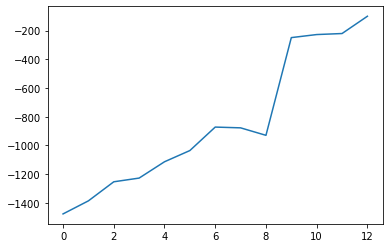

In [18]:
plt.plot(df['episode_reward_mean'])

In [21]:
ModelCatalog.register_custom_model("rbf_model_1", RBFModel1)
ModelCatalog.register_custom_model("rbf_model_2", RBFModel2)
ModelCatalog.register_custom_model("my_keras_model_1", MyKerasModel1)
ModelCatalog.register_custom_model("my_keras_model_2", MyKerasModel2)

ray.shutdown()
ray.init()

# !! change this line to reflect the algorithm you used
#trainer = ppo.PPOTrainer(config)#, config['env_name'])
#trainer = ddpg.DDPGTrainer(config)
trainer = sac.SACTrainer(config)
trainer.restore(checkpoint_path)

2020-01-28 14:42:43,495	WARNING services.py:597 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-01-28 14:42:43,496	INFO resource_spec.py:216 -- Starting Ray with 4.98 GiB memory available for workers and up to 2.49 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-01-28 14:42:44,019	WARNING sac_policy.py:31 -- Setting use_state_preprocessor=True since a custom model was specified.


ValueError: Registry value for rllib_model/rbf_model_2 doesn't exist.

In [21]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
%matplotlib inline

#env = gym.make(env_name)
#env.unwrapped.reset_model = det_reset_model

# !! this needs to reflect the environemnt you trained in
env = gym.make("Pendulum-v0")
env._max_episode_steps = 10000
obs = env.reset()



action_hist = []
m_act_hist = []
state_hist  = []
obs_hist = []
reward_hist = []

done = False
while not done:
    # for some algorithms you can get the sample mean out, need to change the value on the index to match your env for now
    # mean_actions = out_dict['behaviour_logits'][:17]
    # actions = trainer.compute_action(obs.flatten())
    sampled_actions, _ , out_dict = trainer.compute_action(obs.flatten(),full_fetch=True)
    
    actions = sampled_actions
   
    
    obs, reward, done, _ = env.step(np.asarray(actions))
    
    # !! uncomment to render
    #env.render()
    
    action_hist.append(np.copy(actions))
    obs_hist.append(np.copy(obs))
    reward_hist.append(np.copy(reward))

    if done:
        break

print(sum(reward_hist))
print(len(obs_hist))
#plt.plot(action_hist)
#plt.figure()
#plt.figure()
#plt.plot(obs_hist)
#plt.figure()

NameError: name 'trainer' is not defined

In [22]:
# Reminder that the bahavior logits that come out are the mean and logstd (not log mean, despite the name logit)
trainer.compute_action(obs, full_fetch=True)

(array([1.3042605], dtype=float32),
 [],
 {'action_prob': 1.6121755, 'action_logp': 0.47758448})